# COMP 551 - Assignment 1 
### Tiffany Wang 260684152

I will be using the libraries numpy and pandas to parse csv data files and compute the matrix / vector operations. 

In [2]:
import numpy 
import pandas 
import matplotlib.pyplot as plt
import random


## Part 1 

I parsed the training, validation and testing sets into their respective input and output.


In [67]:
trainingSet_1 = pandas.read_csv('./Datasets/Dataset_1_train.csv', header=None)
validSet_1 = pandas.read_csv('./Datasets/Dataset_1_valid.csv', header=None)
testSet_1 = pandas.read_csv('./Datasets/Dataset_1_test.csv', header=None)

trainingSet_1.sort_values(by=[0], inplace=True)
validSet_1.sort_values(by=[0], inplace=True)
testSet_1.sort_values(by=[0], inplace=True)

train1_x = trainingSet_1[0]
train1_y = trainingSet_1[1]
trainingSet_1.drop([1, 2], axis=1, inplace=True)

valid1_x = validSet_1[0]
valid1_y = validSet_1[1]
validSet_1.drop([1, 2], axis=1, inplace=True)


test1_x = testSet_1[0]
test1_y = testSet_1[1]
testSet_1.drop([1, 2], axis=1, inplace=True)

<br><br>
The following three functions will be used throughout the first part of this assignment
<br>

In [68]:
def weightCalc(matrix, output):
    XTX_inv = numpy.linalg.pinv(numpy.matmul(matrix.T, matrix))
    XT_y = numpy.matmul(matrix.T, output)
    return numpy.matmul(XTX_inv, XT_y)

The weights parameters calculation is:   $W = (X^{T} X)^{-1}X^{T}y$
           

In [69]:
def weightCalc_reg(matrix, l, output):
    XTX_inv = numpy.linalg.pinv(numpy.matmul(matrix.T, matrix) + l * numpy.identity(21))
    XT_y = numpy.matmul(matrix.T, output)
    return numpy.matmul(XTX_inv, XT_y)

With regularization, the weight parameters are calculated using: $W = (X^{T}X - \lambda*I)^{-1}X^{T}y$

In [70]:
def mseCalc(matrix, weight, output):
    predict  = numpy.matmul(matrix, weight)
    train_error = numpy.power(numpy.subtract(predict, output), 2)
    return train_error.mean()

This function calculates the Mean Square Error between the predicted output and the true output. <br> 
The formula is: $MSE = \frac{1}{N}\sum_{i=1}^n (\hat{y}^{(i)} - y^{(i)})^2$

##### Question 1
Fit a 20-degree polynomial to the data. Report the training and validation MSE (Mean-
Square Error). Do not use any regularization. Visualize the fit. Comment about the
quality of the fit.
<br>
<br>
The first step is the create the feature matrices for all training, validation and testing set

In [71]:
N = 21 

# training set
train_matrix = trainingSet_1
train_matrix.columns = [1]
for i in range(N):
    train_matrix[i] = pow(train_matrix[1], numpy.float64(i))

train_matrix = train_matrix.sort_index(axis=1, ascending=True)

# validation set
valid_matrix = validSet_1
valid_matrix.columns = [1]
for i in range(N):
    valid_matrix[i] = pow(valid_matrix[1], numpy.float64(i))

valid_matrix = valid_matrix.sort_index(axis=1, ascending=True)


# test set
test_matrix = testSet_1
test_matrix.columns = [1]
for i in range(N):
    test_matrix[i] = pow(test_matrix[1], numpy.float64(i))

test_matrix = test_matrix.sort_index(axis=1, ascending=True)


In [85]:
weight = weightCalc(train_matrix, train1_y)
'''
Mean Square Error computation
MSE = 1/N * sum((xw - y)^2)
'''
# TRAINING SET
predict_train = numpy.matmul(train_matrix, weight)

train_error = numpy.power(numpy.subtract(predict_train, train1_y), 2)
train_mse = train_error.mean()


print("\nTraining set MSE: ", train_mse)

# VALIDATION SET
predict_valid = numpy.matmul(valid_matrix, weight)

valid_error = numpy.power(numpy.subtract(predict_valid, valid1_y), 2)
valid_mse = valid_error.mean()

print("\nValidation set MSE: ", valid_mse)

# test SET
predict_test = numpy.matmul(test_matrix, weight)

test_error = numpy.power(numpy.subtract(predict_test, test1_y), 2)
test_mse = test_error.mean()

print("\nTest set MSE: ", test_mse)



Training set MSE:  7.1527141960010985

Validation set MSE:  457.9998179457925

Test set MSE:  17.24900013657956


In [89]:
train_mse_reg = []
valid_mse_reg = []
test_mse_reg = []

min_valError = float('inf')
lambda_minError = 0

lambdas = [0.001 * i for i in range(1000)]
for i in lambdas:
    weight_reg = weightCalc_reg(train_matrix, i, train1_y)

    # TRAINING SET
    predict_train_reg = numpy.matmul(train_matrix, weight_reg)

    train_error_reg = numpy.power(numpy.subtract(predict_train_reg, train1_y), 2)
    train_mse_2 = train_error_reg.mean()

    train_mse_reg.append(train_mse_2)

    # VALIDATION SET
    predict_valid_red = numpy.matmul(valid_matrix, weight_reg)

    valid_error_reg = numpy.power(numpy.subtract(predict_valid_red, valid1_y), 2)
    valid_mse_2 = valid_error_reg.mean()

    if valid_mse_2 < min_valError :
        min_valError = valid_mse_2
        lambda_minError = i

    valid_mse_reg.append(valid_mse_2)

    # TEST SET
    predict_test_reg = numpy.matmul(test_matrix, weight_reg)

    test_error_reg = numpy.power(numpy.subtract(predict_test_reg, test1_y), 2)
    test_mse_2 = test_error_reg.mean()

    test_mse_reg.append(test_mse_2)
    

index = numpy.argmin(valid_mse_reg)
best_lambda = lambdas[index]
print("best lambda: " + str(best_lambda))
print("smallest train MSE: " + str(train_mse_reg[index]))
print("smallest valid MSE: " + str(valid_mse_reg[index]))
print("smallest test MSE: " + str(test_mse_reg[index]))


best lambda: 0.02
smallest train MSE: 8.85765667763104
smallest valid MSE: 9.135098784694554
smallest test MSE: 10.730218400927397


In [90]:
 weight_reg = weightCalc_reg(train_matrix, i, train1_y)

# TRAINING SET
best_predict_train = numpy.matmul(train_matrix, weight_reg)

# VALIDATION SET
best_predict_valid = numpy.matmul(valid_matrix, weight_reg)

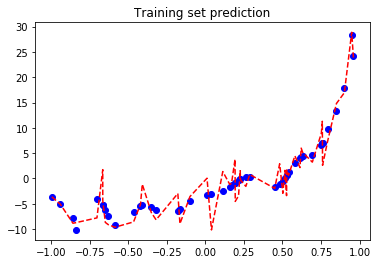

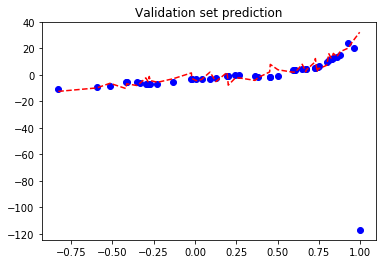

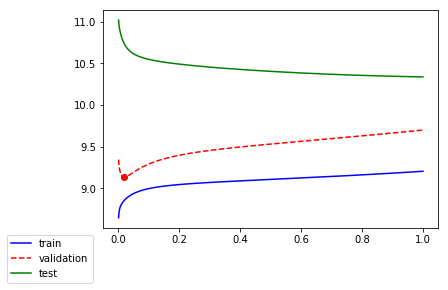

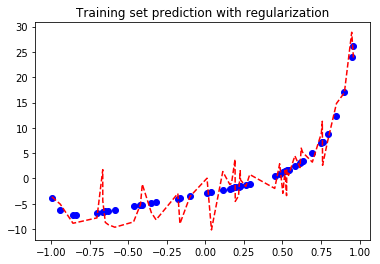

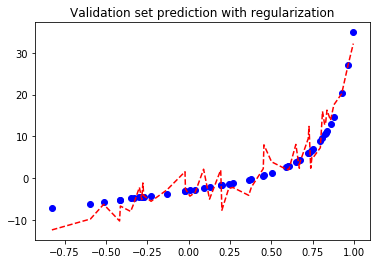

In [92]:
plt.figure(1)
plt.title('Training set prediction')
plt.scatter(train1_x, predict_train, color='b')
plt.plot(train1_x, train1_y, 'r--')

plt.figure(2)
plt.title('Validation set prediction')
plt.scatter(valid1_x, predict_valid, color='b')
plt.plot(valid1_x, valid1_y, 'r--')

plt.figure(3)
plt.plot(lambdas[1:], train_mse_reg[1:], 'b-', label="train")
plt.plot(lambdas[1:], valid_mse_reg[1:], 'r--', label="validation")
plt.plot(lambdas[1:], test_mse_reg[1:], 'g-', label="test")

plt.scatter([lambda_minError], [valid_mse_reg[int(lambda_minError*1000)]], color='r')

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(0.1, 0.1),
           bbox_transform=plt.gcf().transFigure, borderaxespad=0.)


plt.figure(4)
plt.title('Training set prediction with regularization')
plt.scatter(train1_x, best_predict_train, color='b')
plt.plot(train1_x, train1_y, 'r--')

plt.figure(5)
plt.title('Validation set prediction with regularization')
plt.scatter(valid1_x, best_predict_valid, color='b')
plt.plot(valid1_x, valid1_y, 'r--')


plt.show()



# Part 2

In [33]:
trainingSet_2 = pandas.read_csv('./Datasets/Dataset_2_train.csv', header=None)
validSet_2 = pandas.read_csv('./Datasets/Dataset_2_valid.csv', header=None)
testSet_2 = pandas.read_csv('./Datasets/Dataset_2_test.csv', header=None)


train2_x = trainingSet_2[0]
train2_y = trainingSet_2[1]
trainingSet_2.drop([2], axis=1, inplace=True)

valid2_x = validSet_2[0]
valid2_y = validSet_2[1]
validSet_2.drop([2], axis=1, inplace=True)

test2_x = testSet_2[0]
test2_y = testSet_2[1]
testSet_2.drop([2], axis=1, inplace=True)


In [39]:
error = 1e-4

In [35]:
def linMSE(input, output, w0, w1):
    predict = input * w0 + w1
    return numpy.power(numpy.subtract(predict, output), 2).mean()

In [40]:
def linReg(train_input, train_output, valid_input, valid_output, step):
    w0 = float(random.random() * 10)
    w1 = float(random.random() * 10)
    train_mse = []
    valid_mse = []
    while True:
        w0_prev = w0
        w1_prev = w1
        for i in range(len(train_input)):
            pred = w0 + train_input[i] * w1
            w0 = w0 - step * (pred - train_output[i])
            w1 = w1 - step * (pred - train_output[i]) * train_input[i]

        train_mse.append(linMSE(train_input, train_output, w0, w1))
        valid_mse.append(linMSE(valid_input, valid_output, w0, w1))

        if (abs(w0 - w0_prev) < error) and (abs(w1 - w1_prev) < error):
            return train_mse, valid_mse, w0, w1

In [37]:
def linRegStep(train_input, train_output, valid_input, valid_output, steps):
    w0 = float(random.random() * 10)
    w1 = float(random.random() * 10)
    valid_mse = []
    for i in range(len(steps)):
        for j in range(1000):
            for k in range(len(train_input)):
                pred = w0 + train_input[k] * w1
                w0 = w0 - steps[i] * (pred - train_output[k])
                w1 = w1 - steps[i] * (pred - train_output[k]) * train_input[k]
        valid_mse.append(linMSE(valid_input, valid_output, w0, w1))
    return valid_mse

(w0, w1) = (3.96210884348, 4.25187908931)


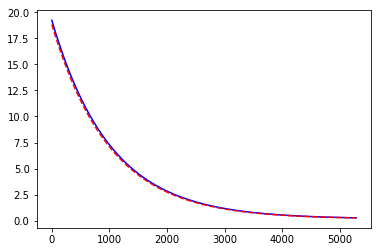

In [42]:
step = 1e-6
mse_train, mse_valid, w0, w1 = linReg(train2_x, train2_y, valid2_x, valid2_y, step)

print("(w0, w1) = " + "(" + str(w0) +", " + str(w1) + ")") 

epoch = [i for i in range(len(mse_train))]

plt.figure(1)
plt.plot(epoch[1:], mse_train[1:], 'b-')
plt.plot(epoch[1:], mse_valid[1:], 'r--')

# Place a legend 
plt.legend(bbox_to_anchor=(0.1, 0.1),
           bbox_transform=plt.gcf().transFigure, borderaxespad=0.)

plt.show()

the best mse is: 0.08974521759836933
the best step is:1.9999999999999998e-05


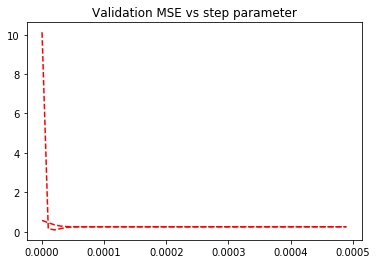

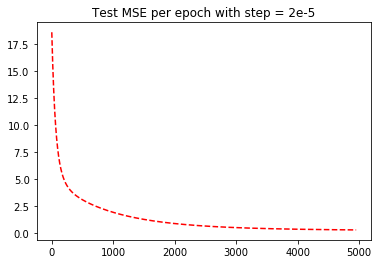

In [45]:
steps = [10 * i * 1e-6 for i in range(0, 50)]
mse_valid_step = linRegStep(train2_x, train2_y, valid2_x, valid2_y, steps)

plt.figure(1)
plt.plot(steps, mse_valid_step, 'r--')
plt.title('Validation MSE vs step parameter')

index = numpy.argmin(mse_valid_step)
print("the best mse is: " + str(mse_valid_step[index]))
print("the best step is:" + str(steps[index]))

step = steps[index]

mse_train, mse_test, w0, w1 = linReg(train2_x, train2_y, test2_x, test2_y, step)
epoch = [i for i in range(len(mse_test))]

plt.figure(2)
plt.title('Test MSE per epoch with step = 2e-5')
plt.plot(epoch[1:], mse_test[1:], 'r--')

plt.show()

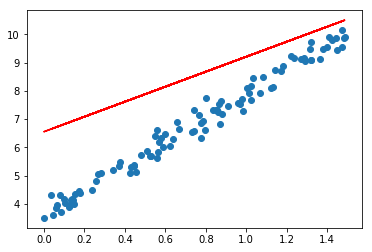

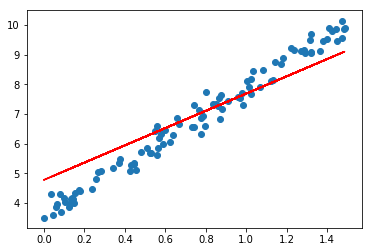

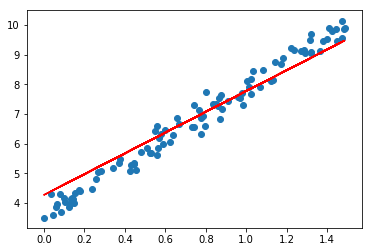

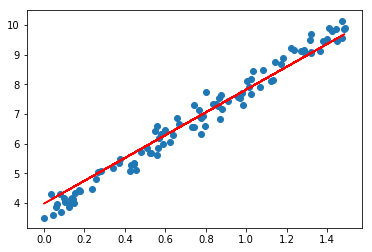

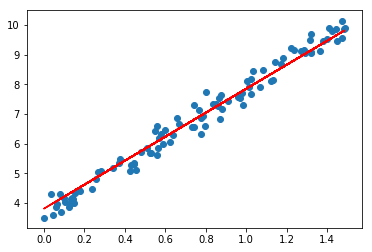

In [46]:
step = steps[index]
w0 = float(random.random() * 10)
w1 = float(random.random() * 10)

params = []

while True:
    w0_prev = w0
    w1_prev = w1
    for i in range(len(train2_x)):
        pred = w0 + train2_x[i] * w1
        w0 = w0 - step * (pred - train2_y[i])
        w1 = w1 - step * (pred - train2_y[i]) * train2_x[i]

    params.append([w0, w1])

    if (abs(w0 - w0_prev) < error) and (abs(w1 - w1_prev) < error):
        break

for i in range(5):
    index = int(i * len(params) / 5)
    weight = params[index]
    pred = weight[1] * test2_x + weight[0]
    plt.figure(i + 1)
    plt.scatter(test2_x, test2_y)
    plt.plot(test2_x, pred, 'r-')

plt.show()

# Part 3

In [3]:
dataset = pandas.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', header=None)
dataset.drop([0, 1, 2, 3, 4], axis=1, inplace=True)
dataset = dataset.replace('?', -999999).astype(numpy.float64).replace(-999999, numpy.nan)
dataset.fillna(dataset.mean(), inplace=True)

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.01,0.58,0.10,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.05,0.08,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.01,0.33,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.04,0.17,0.04,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.00,0.47,0.11,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.15


In [52]:
for i in range(1, 6):
    temp_data = dataset
    # generate 20% random rows to be put in the training set
    msk = numpy.random.rand(len(temp_data)) <= 0.8
    train = temp_data[msk]
    test = temp_data[~msk]
    train.to_csv('CandC-train' + str(i) + '.csv')
    test.to_csv('CandC-test' + str(i) + '.csv')

In [53]:
def weightCalc(matrix, output):
    XTX_inv = numpy.linalg.pinv(numpy.matmul(matrix.T, matrix))
    XT_y = numpy.matmul(matrix.T, output)
    return numpy.matmul(XTX_inv, XT_y)

In [54]:
def weightCalc_reg(matrix, l, output):
    XTX_inv = numpy.linalg.pinv(numpy.matmul(matrix.T, matrix) + l * numpy.identity(len(matrix.columns)))
    XT_y = numpy.matmul(matrix.T, output)
    return numpy.matmul(XTX_inv, XT_y)

In [55]:
def mseCalc(predict, output):
    train_error = numpy.power(numpy.subtract(predict, output), 2)
    return train_error.mean()

In [56]:
def parsedata(filename):
    ds = pandas.read_csv(filename, header=None)
    ds.drop([0], axis=0, inplace=True)
    output = ds[len(ds.columns) - 1]
    ds.drop([0, len(ds.columns) - 1], axis=1, inplace=True)
    ds[0] = 1
    ds = ds.sort_index(axis=1, ascending=True)
    return ds, output

In [57]:
step = 1e-3
mse = []

for i in range(1, 6):
    ds, viol = parsedata('CandC-train' + str(i) + '.csv')
    test, test_output = parsedata('CandC-test' + str(i) + '.csv')
    weight = weightCalc(ds, viol)
    numpy.savetxt('3_2_weights' + str(i) + 'noreg.csv', weight, delimiter=',')

    prediction = numpy.matmul(test, weight)
    mse.append(mseCalc(prediction, test_output))

print("without regularization: " + str(numpy.mean(mse)))

without regularization: 1.52925945281


In [58]:
error = []
lambdas = [0.02 * i for i in range(500)]

avg_mse = []
ds = []
viol = []
test = []
test_output = []

for i in range(1, 6):
    ds_temp, viol_temp = parsedata('CandC-train' + str(i) + '.csv')
    test_temp, test_output_temp = parsedata('CandC-test' + str(i) + '.csv')
    ds.append(ds_temp)
    viol.append(viol_temp)
    test.append(test_temp)
    test_output.append(test_output_temp)


for l in lambdas:
    mse = []
    mse_list = []

    for i in range(5):
        weight = weightCalc_reg(ds[i], l, viol[i])
        prediction = numpy.matmul(test[i], weight)
        mse_list = mseCalc(prediction, test_output[i])
        mse.append(mse_list)
    avg_mse.append(numpy.mean(mse))
    error.append(mse)

index = numpy.argmin(avg_mse)
print("the best regularization constant lambda is " + str(lambdas[index]))
print("MSE = " + str(error[index]))
print("the average MSE = " + str(numpy.mean(error[index])))


the best regularization constant lambda is 4.04
MSE = [0.01877373578433192, 0.018560167714681344, 0.017457161473635442, 0.01974051702436497, 0.01779909619320838]
the average MSE = 0.018466135638


In [59]:
weight_reg = []
for i in range(5):
    weight = weightCalc_reg(ds[i], lambdas[index], viol[i])
    numpy.savetxt('3_3_weights' + str(i) + 'reg.csv', weight, delimiter=',')
    weight_reg.append(weight)

In [60]:

weights = pandas.DataFrame()
for i in range(1, 6):
    weights[i] = weight_reg[i-1]

weights = numpy.array(pandas.DataFrame.mean(weights, axis=1))
ind = numpy.argpartition(weights, -20)[-20:]

array = [i for i in [x for x in range(len(weights)) if x not in ind]]

mse = []

for i in range(5):
    ds[i].drop(array, axis=1, inplace=True)
    test[i].drop(array, axis=1, inplace=True)
    weight = weightCalc(ds[i], viol[i])
    prediction = numpy.matmul(test[i], weight)
    mse.append(mseCalc(prediction, test_output[i]))

print('5-fold cross-validation error with feature selection:' + str(mse))
print('overall average mse with feature selection:' + str(numpy.mean(mse)))


5-fold cross-validation error with feature selection:[0.01975044865454778, 0.019542448599157596, 0.018160745225803753, 0.020395607614049783, 0.01861704194326843]
overall average mse with feature selection:0.0192932584074
